In [72]:
import kagglehub
openfoodfacts_world_food_facts_path = kagglehub.dataset_download('openfoodfacts/world-food-facts')

print('Data source import complete.')

Data source import complete.


In [73]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-food-facts/en.openfoodfacts.org.products.tsv


In [74]:
!ls -lh /kaggle/input/world-food-facts/en.openfoodfacts.org.products.tsv

-rw-r--r-- 1 1000 1000 964M Jul  9 03:56 /kaggle/input/world-food-facts/en.openfoodfacts.org.products.tsv


In [75]:
INPUT_FILE_NAME = f'{openfoodfacts_world_food_facts_path}/en.openfoodfacts.org.products.tsv'
df = pd.read_csv(INPUT_FILE_NAME, sep='\t', low_memory=False)

In [76]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-Processing

In [77]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

###### Missing Value

In [78]:
print("Shape of dataset:", df.shape)
print("\nInfo dataset:")
print(df.info())

Shape of dataset: (356027, 163)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB
None


In [79]:
# Kolom yang ingin digunakan
kolom_numerik = [
    'energy_100g', #kalori
    'fat_100g',
    'carbohydrates_100g',
    'sugars_100g',
    'proteins_100g',
    'product_name',
    'ingredients_text'
]

kolom_numerik  = [col for col in kolom_numerik  if col in df.columns]
df = df[kolom_numerik ].copy()

In [80]:
# Ubah nama kolom
df.rename(columns={
    "energy_100g": "calories",
    "fat_100g": "fat",
    "carbohydrates_100g": "carb",
    "proteins_100g": "protein",
    "sugars_100g": "sugars"
}, inplace=True)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   calories          295367 non-null  float64
 1   fat               279497 non-null  float64
 2   carb              279220 non-null  float64
 3   sugars            279186 non-null  float64
 4   protein           294161 non-null  float64
 5   product_name      338515 non-null  object 
 6   ingredients_text  283893 non-null  object 
dtypes: float64(5), object(2)
memory usage: 19.0+ MB


In [81]:
print("\nCek missing values di tiap kolom:")
print(df.isnull().sum())


Cek missing values di tiap kolom:
calories            60660
fat                 76530
carb                76807
sugars              76841
protein             61866
product_name        17512
ingredients_text    72134
dtype: int64


In [82]:
from sklearn.impute import SimpleImputer

# Kolom numerik yang ingin diisi nilai NaN dengan median
kolom_numerik = [
    'calories',
    'fat',
    'carb',
    'sugars',
    'protein'
]

# Hitung median per kolom
medians = df[kolom_numerik].median()

# Isi nilai NaN dengan median masing-masing kolom
df[kolom_numerik] = df[kolom_numerik].fillna(medians)

# Cek ulang missing value
print("\nCek missing values di tiap kolom:")
print(df.isnull().sum())


Cek missing values di tiap kolom:
calories                0
fat                     0
carb                    0
sugars                  0
protein                 0
product_name        17512
ingredients_text    72134
dtype: int64


###### Data Duplikat

In [83]:
# Cek jumlah duplikat
duplikat_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplikat_count}")

Jumlah baris duplikat: 26580


In [84]:
# Menghapus baris duplikat
df = df.drop_duplicates().reset_index(drop=True)

In [85]:
# Cek ulang jumlah duplikat
duplikat_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplikat_count}")

Jumlah baris duplikat: 0


###### Outlier

In [86]:
for kolom in ['calories', 'fat', 'carb', 'sugars', 'protein']:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[kolom] = df[kolom].clip(lower=lower_bound, upper=upper_bound)

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['calories', 'fat', 'carb', 'sugars', 'protein']] = scaler.fit_transform(
    df[['calories', 'fat', 'carb', 'sugars', 'protein']]
)

###### Normalisasi Data

In [88]:
# 2. Normalisasi nama produk  normalisasi (lowercase, strip).
df["product_name"] = df["product_name"].astype(str).str.lower().str.strip()

## EDA

In [89]:
# Statistik deskriptif nutrisi
nutrisi_cols = ["calories", "fat", "carb", "protein","sugars"]
df[nutrisi_cols].describe()

,calories,fat,carb,protein,sugars
count,329447.000000,329447.000000,329447.000000,329447.000000,329447.000000
mean,0.338368,0.262048,0.253523,0.539530,0.513111
std,0.219957,0.303988,0.227525,0.199718,0.233734
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142057,0.020447,0.068522,0.375000,0.346234
50%,0.330759,0.135208,0.171306,0.489474,0.405509
75%,0.485234,0.412268,0.441113,0.625000,0.607741
max,1.000000,1.000000,1.000000,1.000000,1.000000


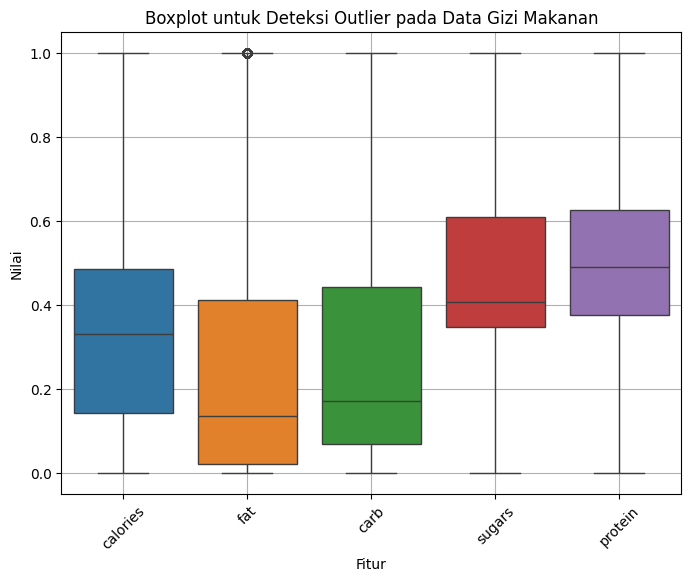

In [90]:
# Jika kamu sudah punya DataFrame, misalnya df
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['calories', 'fat', 'carb', 'sugars', 'protein']])
plt.title('Boxplot untuk Deteksi Outlier pada Data Gizi Makanan')
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

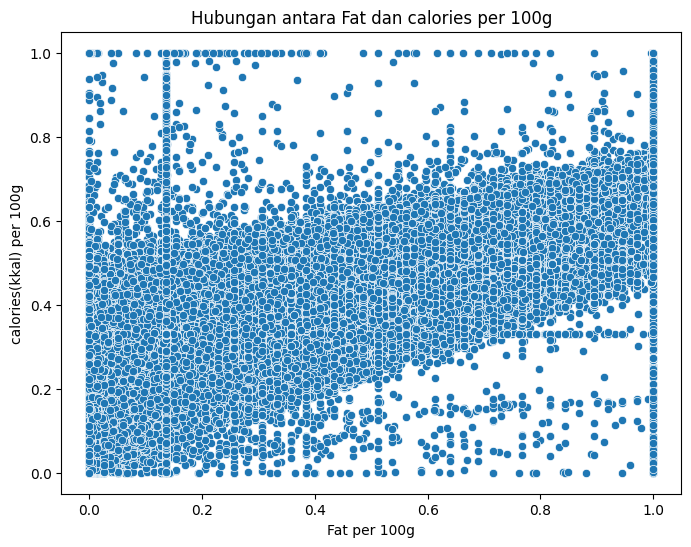

In [91]:
# scatter plot
plt.figure(figsize=(8, 6))
# Change 'mileage' and 'price' to columns that exist in df, e.g., 'fat' and 'energy'
sns.scatterplot(x=df['fat'], y=df['calories'])
plt.title('Hubungan antara Fat dan calories per 100g') # Update title to reflect the new columns
plt.xlabel('Fat per 100g')
plt.ylabel('calories(kkal) per 100g')
plt.show()

Matriks Korelasi (Pearson):


,calories,fat,carb,sugars,protein
calories,1.00,0.74,0.49,0.34,0.32
fat,0.74,1.00,0.01,0.08,0.36
carb,0.49,0.01,1.00,0.63,-0.06
sugars,0.34,0.08,0.63,1.00,-0.24
protein,0.32,0.36,-0.06,-0.24,1.00


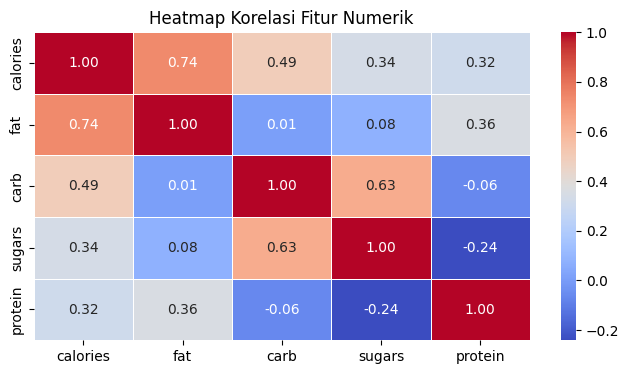

In [92]:
# Heatmap
korelasi = df[kolom_numerik].corr(method="pearson")
print("Matriks Korelasi (Pearson):")
display(korelasi.round(2))

plt.figure(figsize=(8, 4))
sns.heatmap(korelasi, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

## Feature Extraction & Feature Selection

###### Fitur Extraction

In [93]:
# from sklearn.preprocessing import MinMaxScaler

# min_max_scaler_calories = MinMaxScaler()
# df[['calories', 'fat', 'carb', 'sugars', 'protein']] = min_max_scaler_calories.fit_transform(
#     df[['calories', 'fat', 'carb', 'sugars', 'protein']]
# )

###### Fitur Selection

In [94]:
# Hapus baris jika ada nilai nutrisi yang masih NaN (untuk kebutuhan modeling)
df_model = df.dropna(subset=["fat", "carb", "protein", "sugars", "calories"])

# Pembagian Model
X = df_model[["fat", "carb", "protein", "sugars"]]
y = df_model["calories"]

print(f"Jumlah sampel untuk model: {X.shape[0]}")

Jumlah sampel untuk model: 329447


In [95]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [96]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (263557, 4)
Data uji: (65890, 4)


## Modeling

In [97]:
!pip install xgboost

In [98]:
!pip install -U scikit-learn

In [99]:
# Model Linear Regression & evaluasi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model XGBoost (Regressor)
import numpy as np
from xgboost import XGBRegressor

In [100]:
# Periksa ukuran dataset
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test :", y_test.shape)

Ukuran X_train: (263557, 4)
Ukuran X_test : (65890, 4)
Ukuran y_train: (263557,)
Ukuran y_test : (65890,)


In [101]:
# (Opsional) Scaling jika diperlukan, walau XGBoost tidak wajib
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# Inisialisasi model XGBRegressor dengan parameter default
xgb = XGBRegressor(
    objective="reg:squarederror",  # tujuan regresi dengan squared error
    n_estimators=100,               # jumlah pohon (bisa dituning)
    learning_rate=0.1,              # learning rate awal
    max_depth=4,                    # kedalaman maksimal tiap pohon
    random_state=42,
    n_jobs=-1                       # gunakan semua CPU
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [102]:
# # Prediksi
# y_pred = xgb.predict(X_test_scaled)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print("Evaluasi XGBoost di Data Testing:")
print(f"MSE  : {mse:.2f}")
print(f"R²   : {r2:.2f}")
print("-" * 50)

Evaluasi XGBoost di Data Testing:
MSE  : 0.00
R²   : 0.91
--------------------------------------------------


In [105]:
import pickle
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

model = xgb # Menggunakan model xgb yang sudah dilatih di cell H8RlutKGyzTD

# --- MENYIMPAN MODEL ---
# Tentukan nama file untuk menyimpan model
nama_file = 'model_kalori.pkl' # Ubah nama file agar lebih jelas

# Buka file dalam mode 'write binary' (wb) dan simpan model
with open(nama_file, 'wb') as file:
    pickle.dump(model, file)

print(f"Model telah disimpan dalam file '{nama_file}'")

# --- MEMUAT MODEL ---
# Untuk menggunakannya lagi, buka file dalam mode 'read binary' (rb)
with open('model_kalori.pkl', 'rb') as file:
    model_yang_dimuat = pickle.load(file)

print("Model berhasil dimuat.")

Model telah disimpan dalam file 'model_kalori.pkl'
Model berhasil dimuat.


In [106]:
# Di notebook Anda, setelah cell 55
import pickle

# 'scaler' adalah objek MinMaxScaler yang sudah di-fit pada data Anda
nama_file_scaler = 'scaler_kalori.sav'
with open(nama_file_scaler, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Scaler berhasil disimpan sebagai {nama_file_scaler}")

Scaler berhasil disimpan sebagai scaler_kalori.sav
